In [97]:
import ROOT
from root_numpy import root2array, tree2array
import pandas as pd
import matplotlib.pyplot as plt
import os

In [98]:
rootfiles = os.popen('ls output/').read().split('\n')[:-1]
rootfiles

['pMSSM_MCMC_1_0to300.root',
 'pMSSM_MCMC_1_1200to1500.root',
 'pMSSM_MCMC_1_1500to1800.root',
 'pMSSM_MCMC_1_1800to2100.root',
 'pMSSM_MCMC_1_2100to2400.root',
 'pMSSM_MCMC_1_2400to2700.root',
 'pMSSM_MCMC_1_300to600.root',
 'pMSSM_MCMC_1_600to900.root',
 'pMSSM_MCMC_1_900to1200.root']

In [99]:
df = pd.DataFrame()

for file in rootfiles:
    rfile = ROOT.TFile('output/'+file)
    intree = rfile.Get('mcmc')

    array = tree2array(intree)
    df = pd.concat([df,pd.DataFrame(array)])

/cvmfs/sft.cern.ch/lcg/views/LCG_98python3/x86_64-centos7-gcc9-opt/lib/python3.7/site-packages/root_numpy/_tree.py:437: RootNumpyUnconvertibleWarning: cannot convert leaf 'hb_chi2_stdout' of branch 'hb_chi2_stdout' with type 'TString' (skipping)
  cache_size)
/cvmfs/sft.cern.ch/lcg/views/LCG_98python3/x86_64-centos7-gcc9-opt/lib/python3.7/site-packages/root_numpy/_tree.py:437: RootNumpyUnconvertibleWarning: cannot convert leaf 'hs_stdout' of branch 'hs_stdout' with type 'TString' (skipping)
  cache_size)
/cvmfs/sft.cern.ch/lcg/views/LCG_98python3/x86_64-centos7-gcc9-opt/lib/python3.7/site-packages/root_numpy/_tree.py:437: RootNumpyUnconvertibleWarning: cannot convert leaf 'hb_stdout' of branch 'hb_stdout' with type 'TString' (skipping)
  cache_size)
/cvmfs/sft.cern.ch/lcg/views/LCG_98python3/x86_64-centos7-gcc9-opt/lib/python3.7/site-packages/root_numpy/_tree.py:437: RootNumpyUnconvertibleWarning: cannot convert leaf 'superiso_stdout' of branch 'superiso_stdout' with type 'TString' (sk

/cvmfs/sft.cern.ch/lcg/views/LCG_98python3/x86_64-centos7-gcc9-opt/lib/python3.7/site-packages/root_numpy/_tree.py:437: RootNumpyUnconvertibleWarning: cannot convert leaf 'hb_chi2_stdout' of branch 'hb_chi2_stdout' with type 'TString' (skipping)
  cache_size)
/cvmfs/sft.cern.ch/lcg/views/LCG_98python3/x86_64-centos7-gcc9-opt/lib/python3.7/site-packages/root_numpy/_tree.py:437: RootNumpyUnconvertibleWarning: cannot convert leaf 'hs_stdout' of branch 'hs_stdout' with type 'TString' (skipping)
  cache_size)
/cvmfs/sft.cern.ch/lcg/views/LCG_98python3/x86_64-centos7-gcc9-opt/lib/python3.7/site-packages/root_numpy/_tree.py:437: RootNumpyUnconvertibleWarning: cannot convert leaf 'hb_stdout' of branch 'hb_stdout' with type 'TString' (skipping)
  cache_size)
/cvmfs/sft.cern.ch/lcg/views/LCG_98python3/x86_64-centos7-gcc9-opt/lib/python3.7/site-packages/root_numpy/_tree.py:437: RootNumpyUnconvertibleWarning: cannot convert leaf 'superiso_stdout' of branch 'superiso_stdout' with type 'TString' (sk

In [100]:
df.columns
df.shape

(2699, 49)

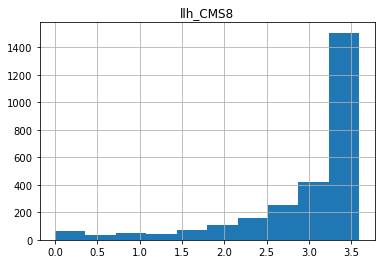

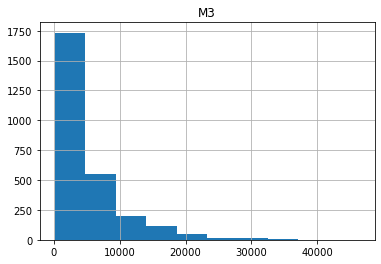

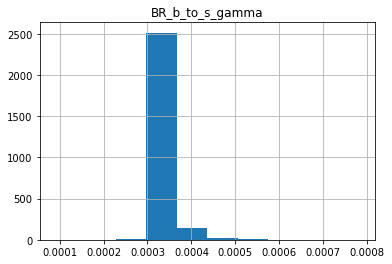

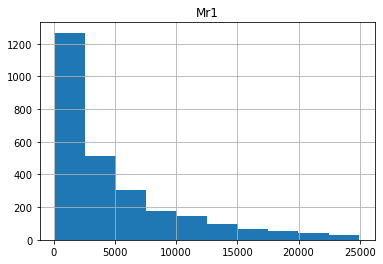

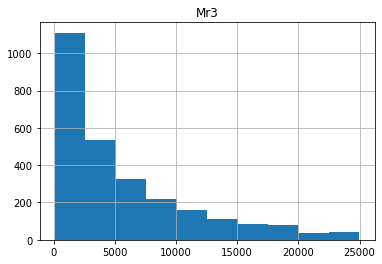

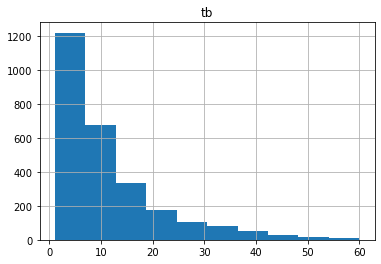

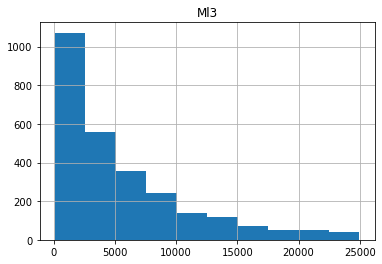

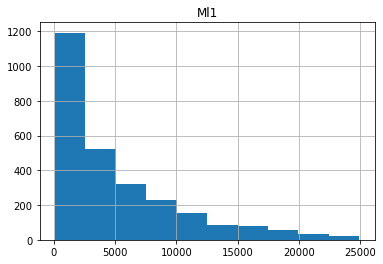

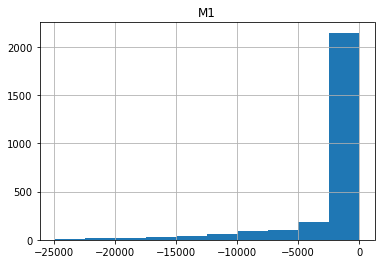

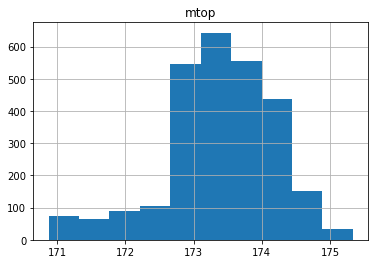

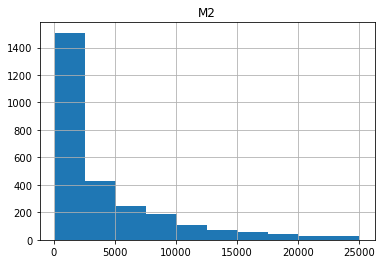

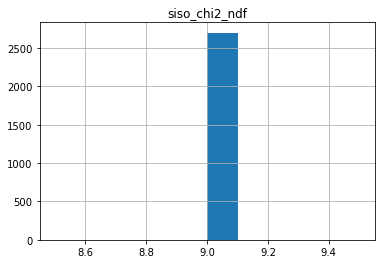

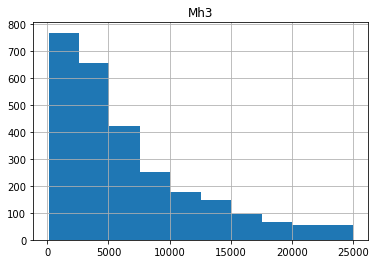

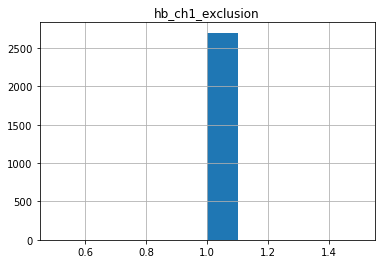

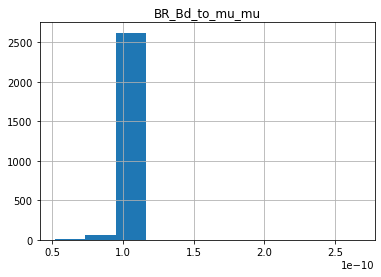

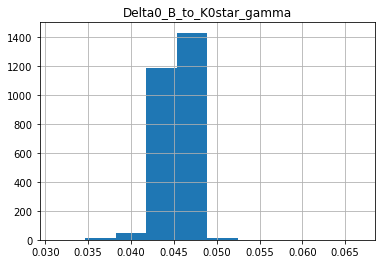

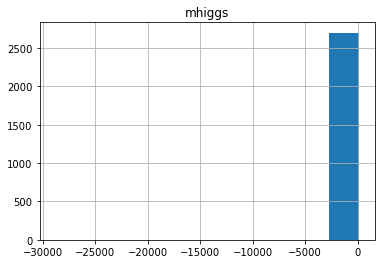

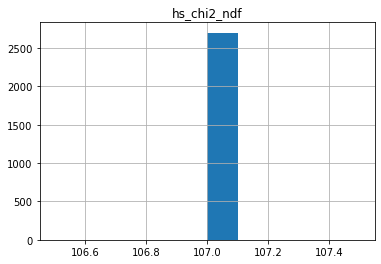

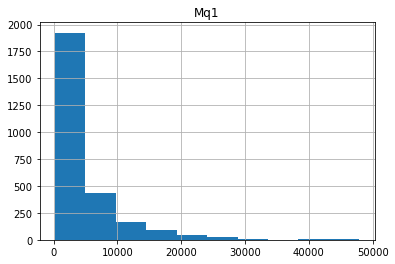

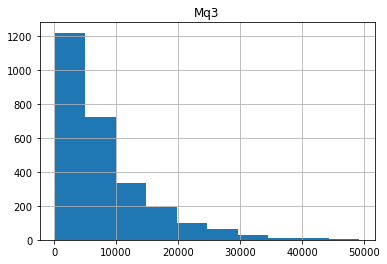

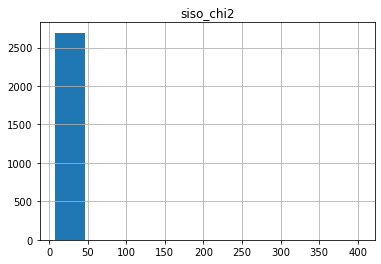

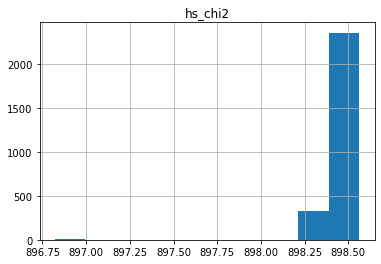

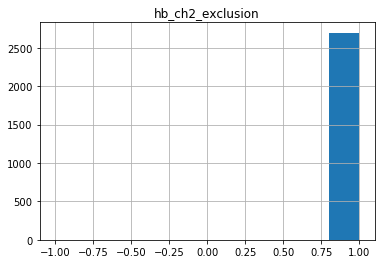

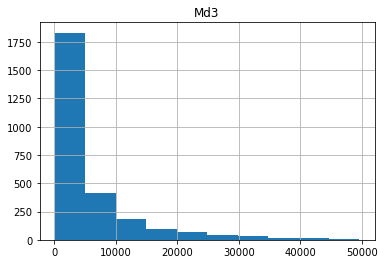

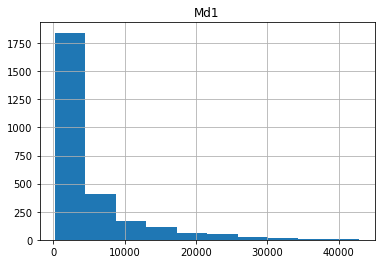

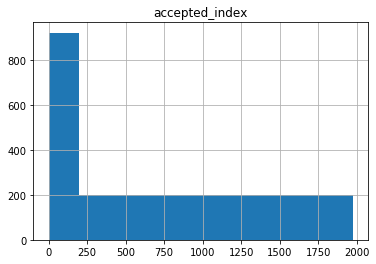

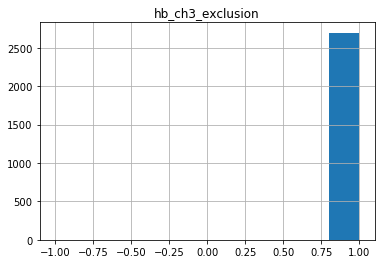

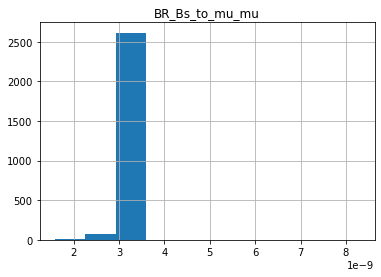

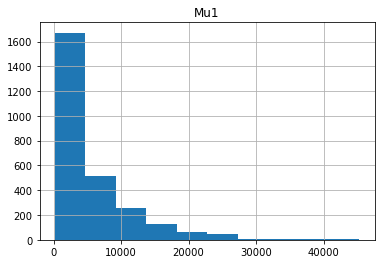

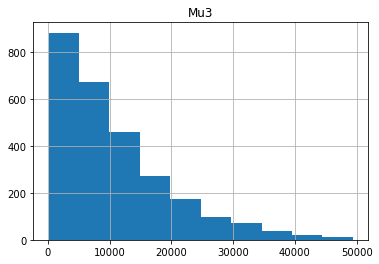

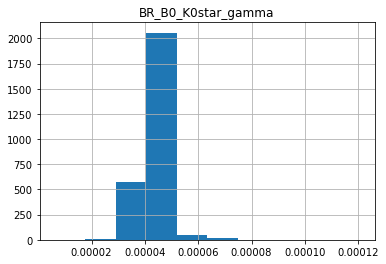

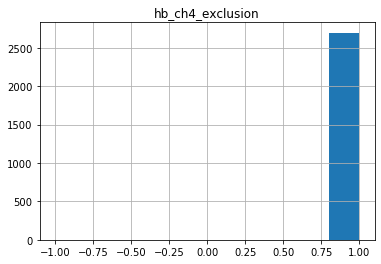

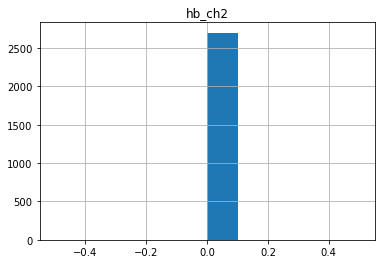

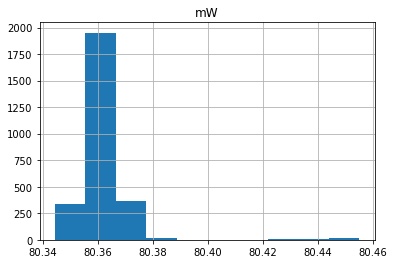

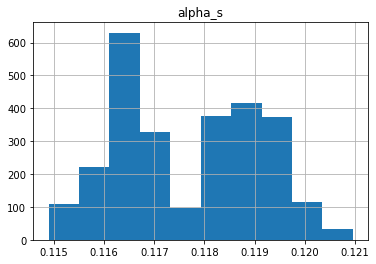

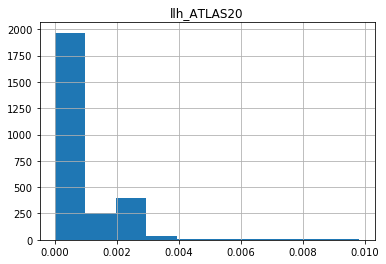

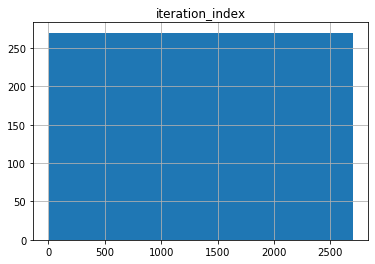

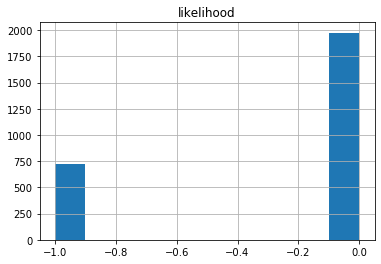

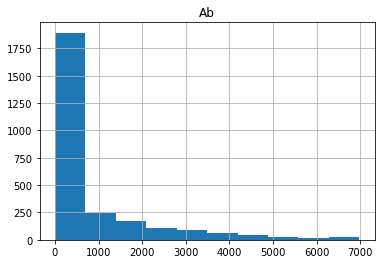

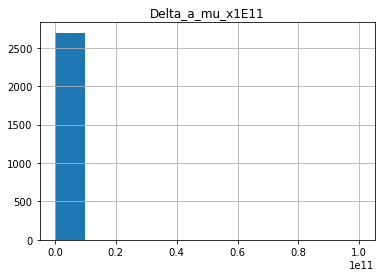

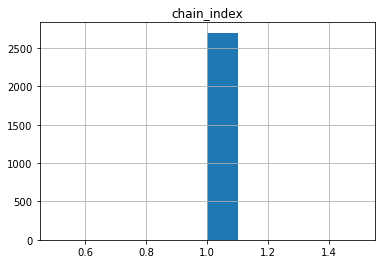

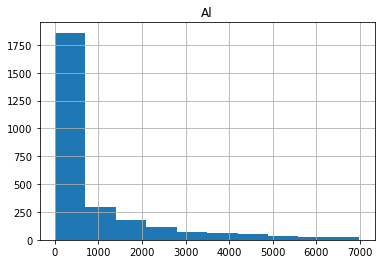

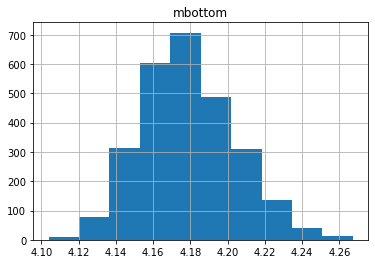

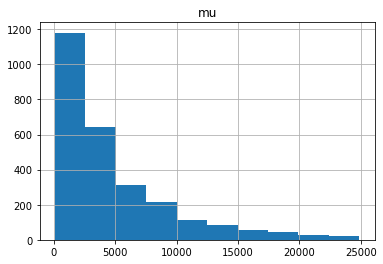

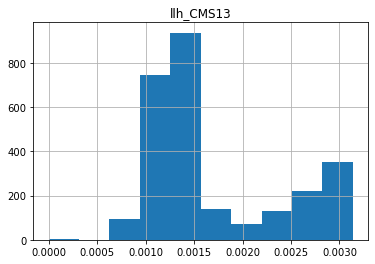

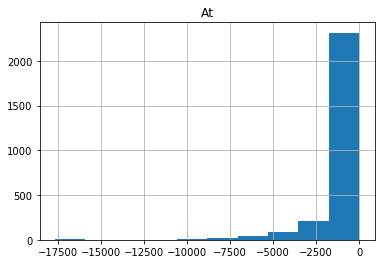

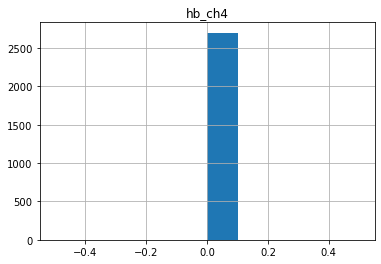

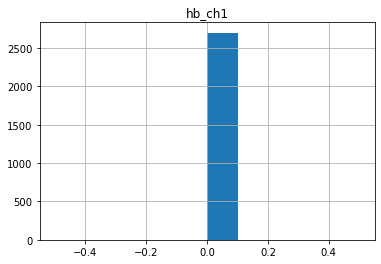

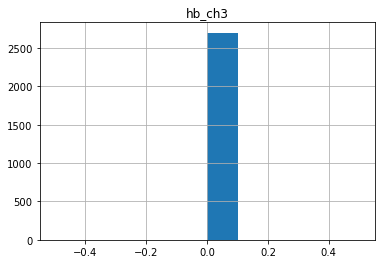

In [101]:
for v in df.columns:
    df.hist(v)

In [102]:
accepted_df = df[df['accepted_index']>=0]
failed_df = df[df['accepted_index']<0]

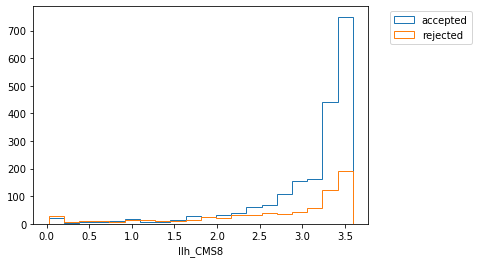

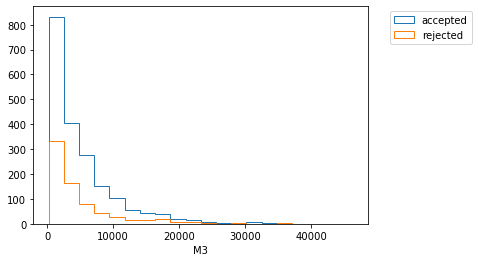

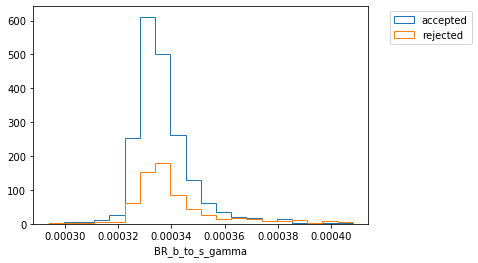

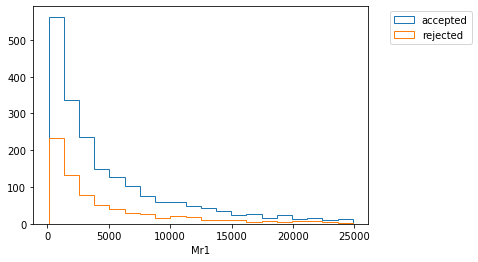

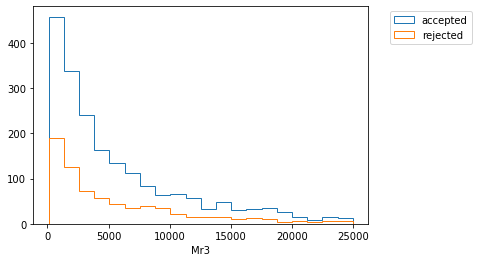

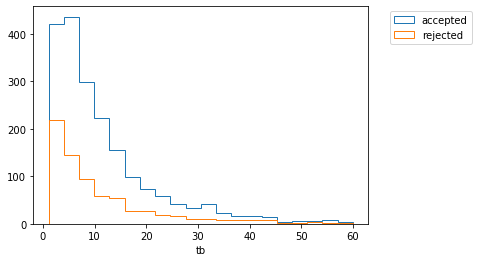

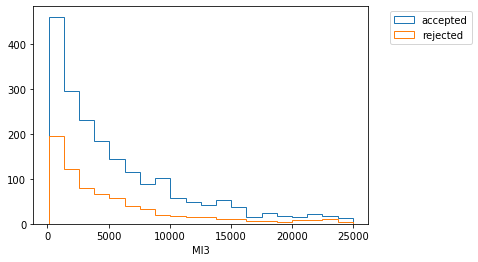

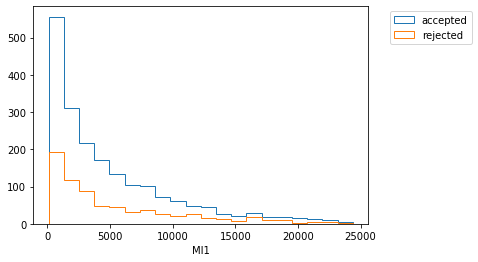

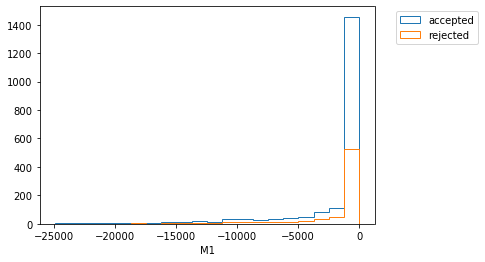

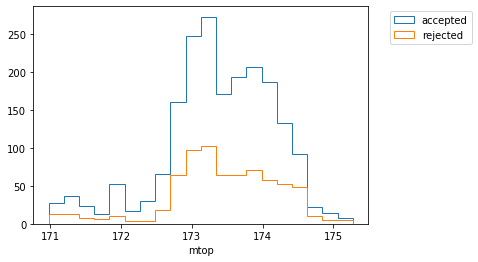

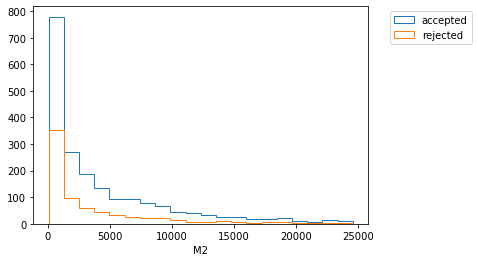

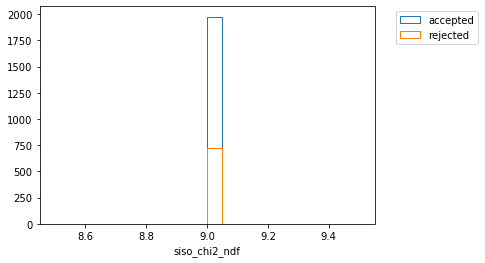

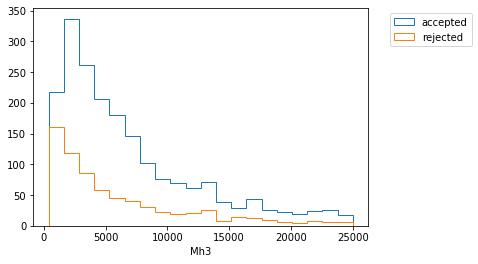

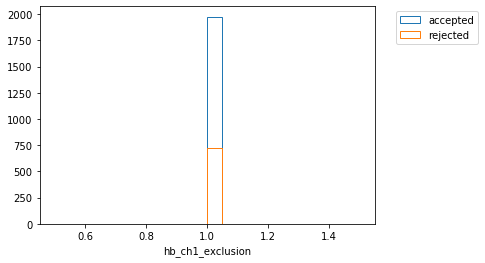

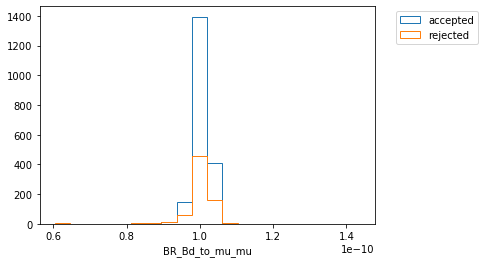

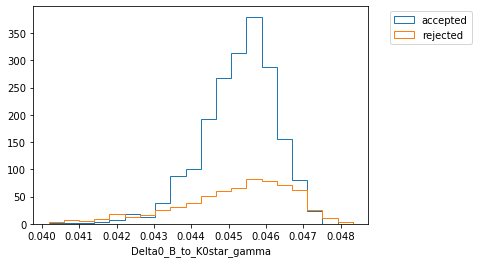

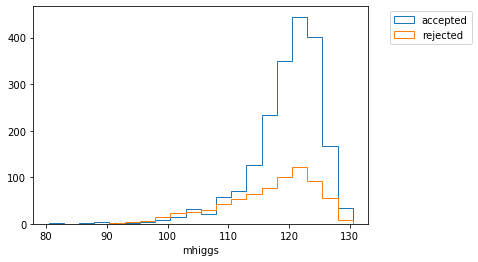

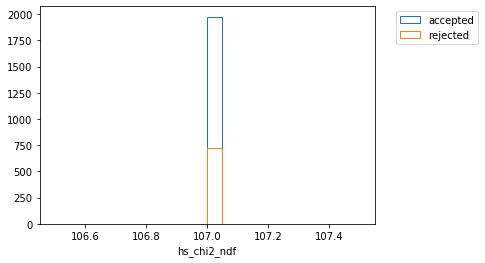

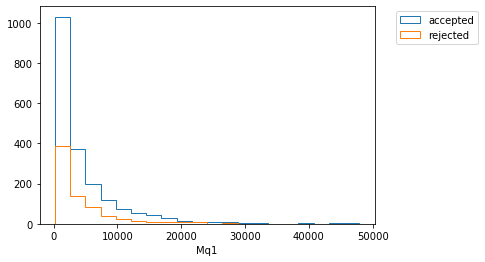

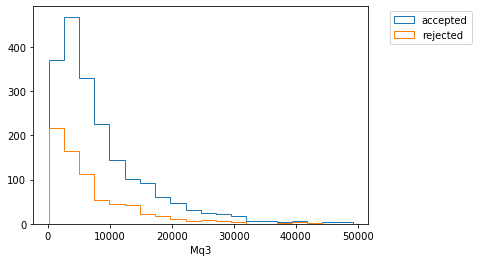

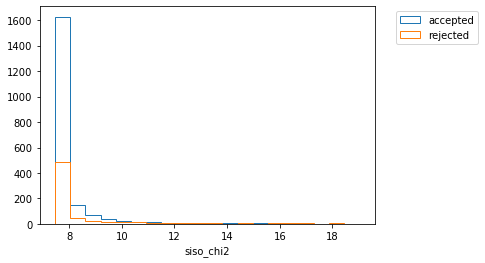

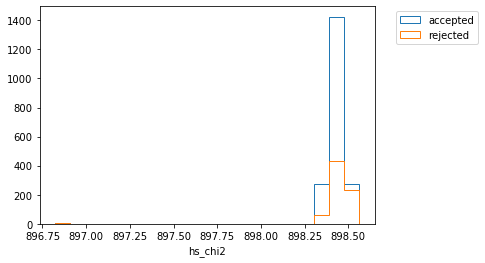

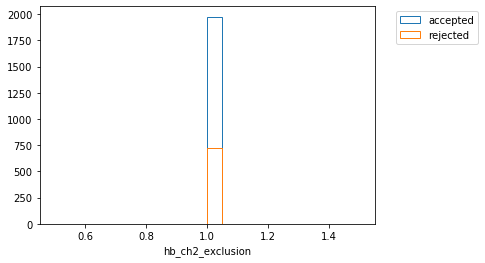

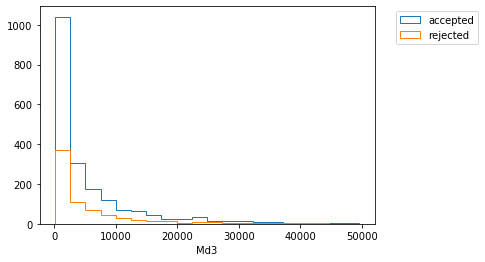

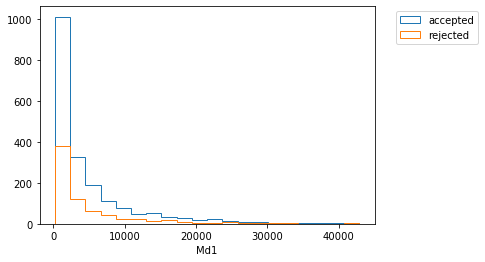

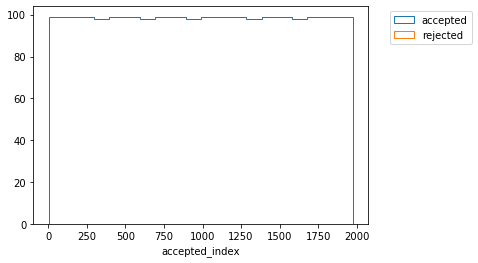

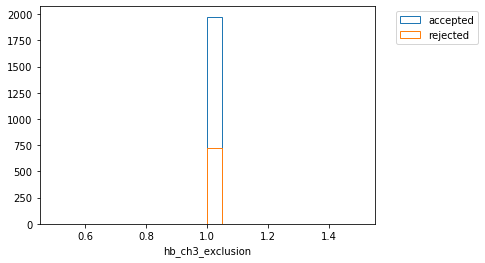

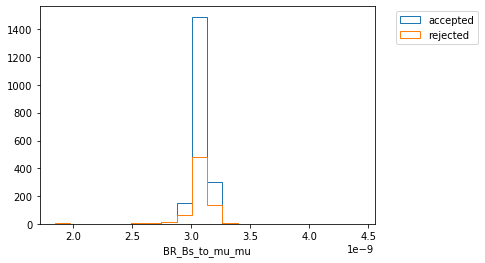

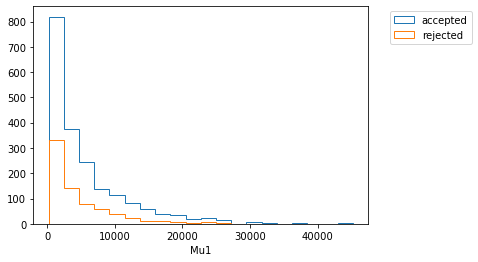

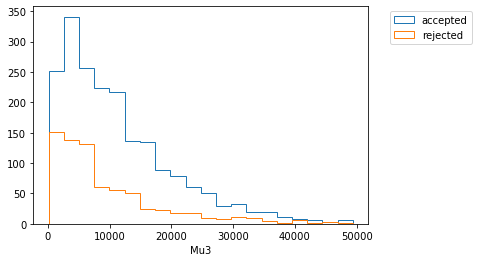

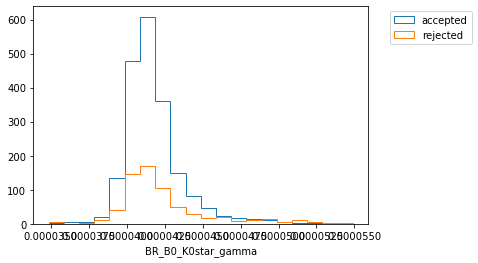

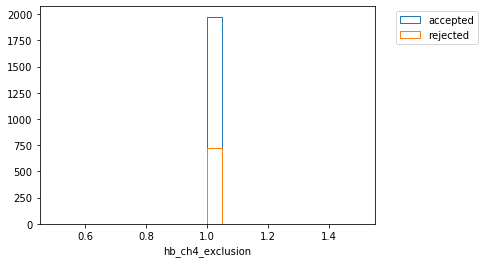

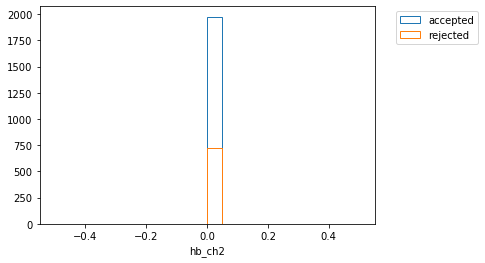

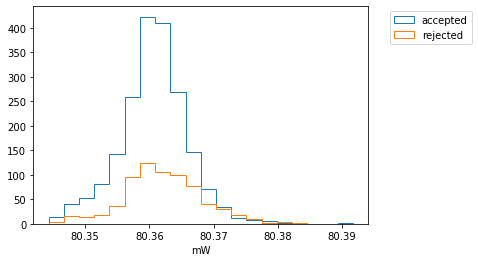

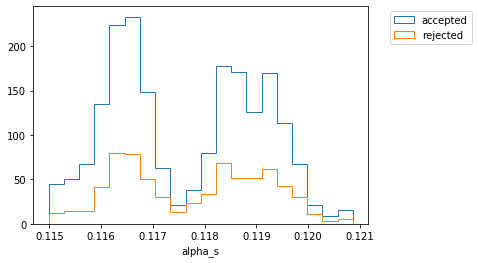

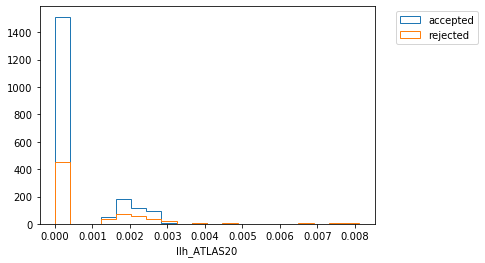

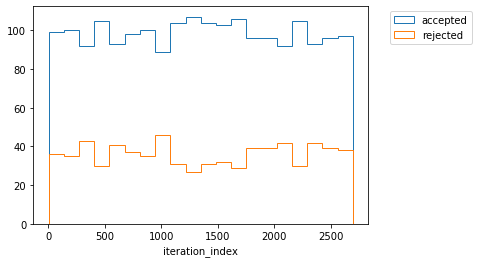

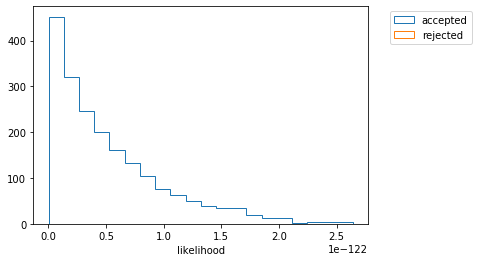

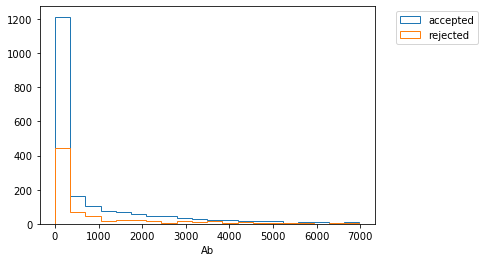

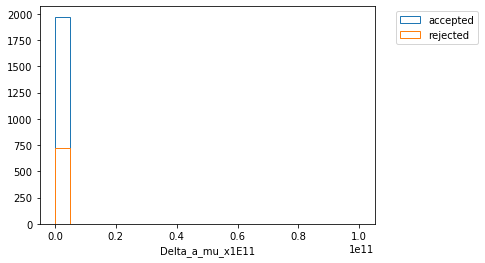

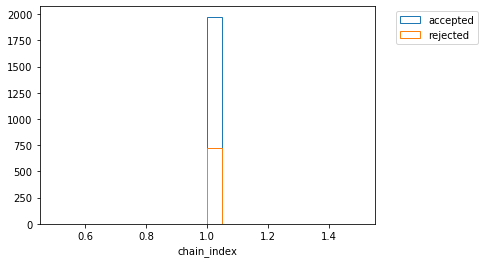

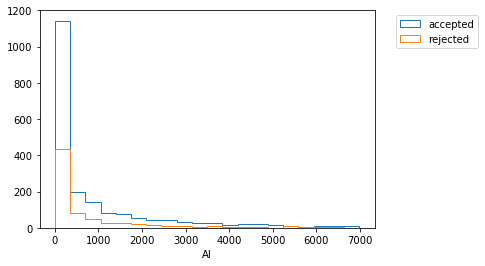

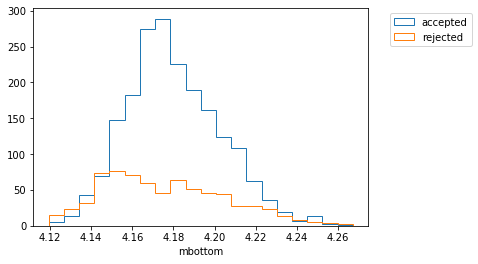

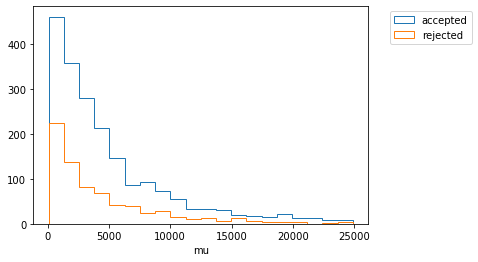

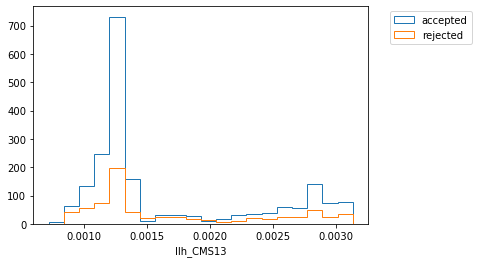

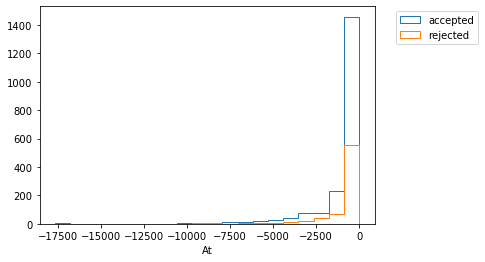

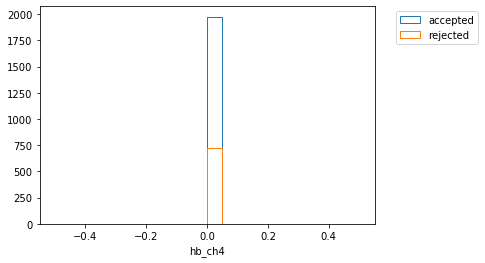

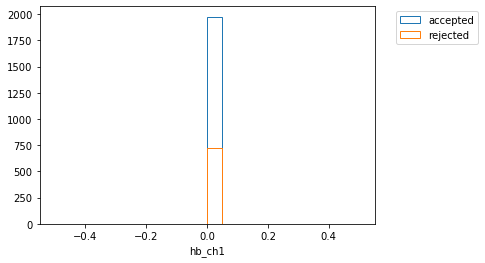

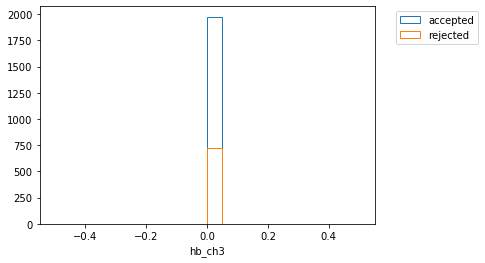

In [107]:
for v in df.columns:
    blah,bins,blah = plt.hist(accepted_df[v],bins=20,histtype='step')
    plt.hist(failed_df[v],bins=bins,histtype='step')
    plt.legend(['accepted','rejected'],bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel(v)
    plt.show()

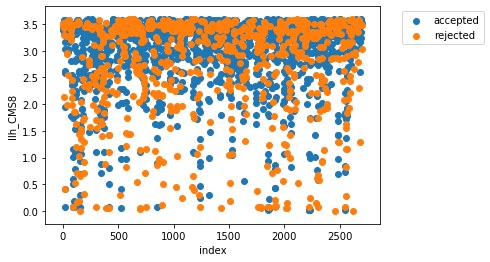

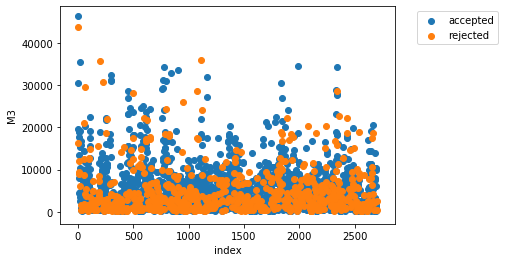

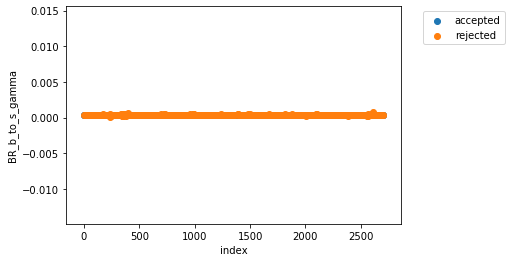

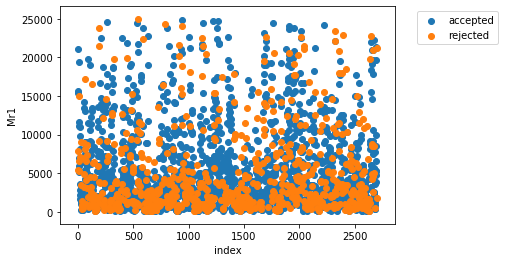

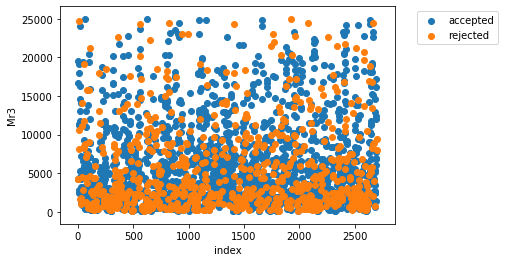

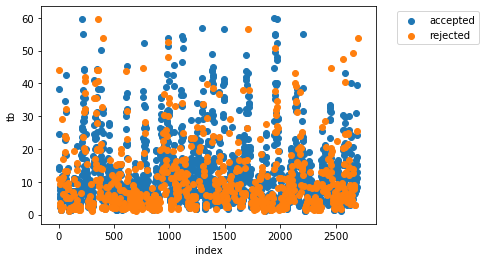

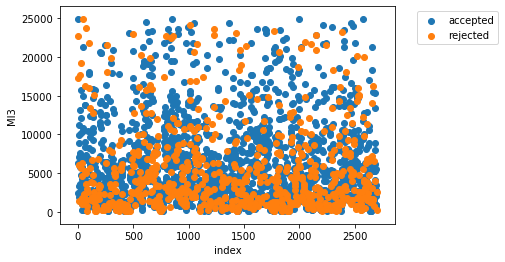

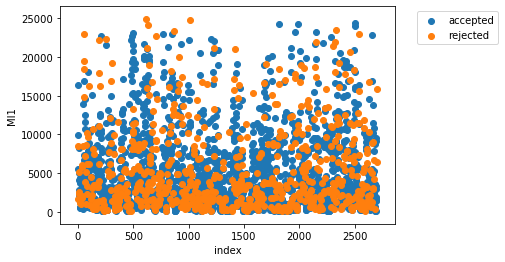

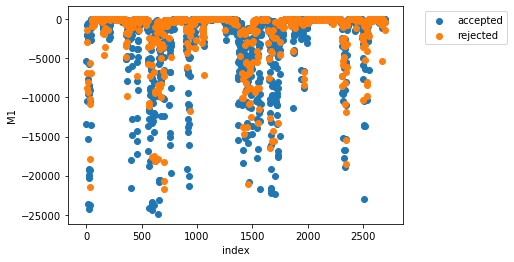

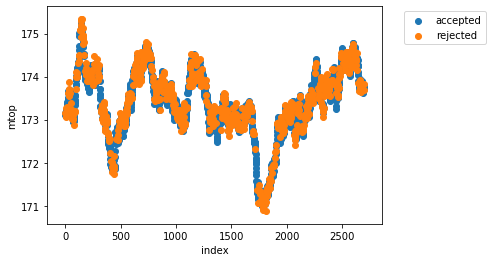

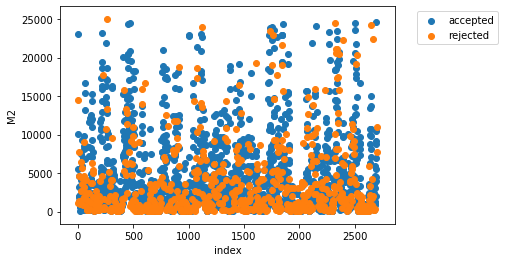

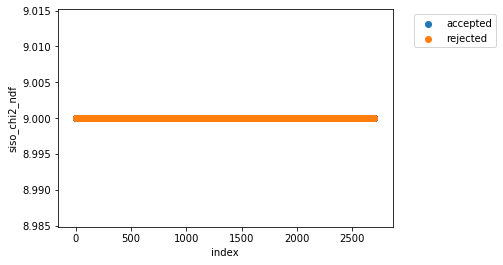

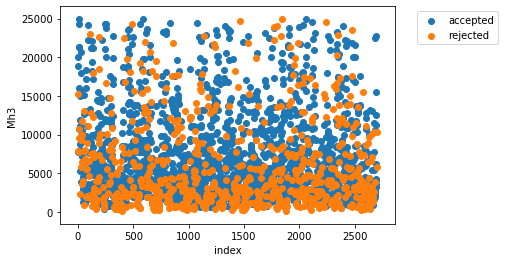

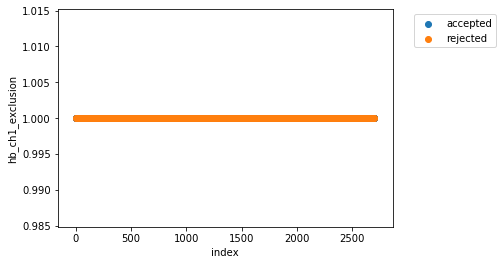

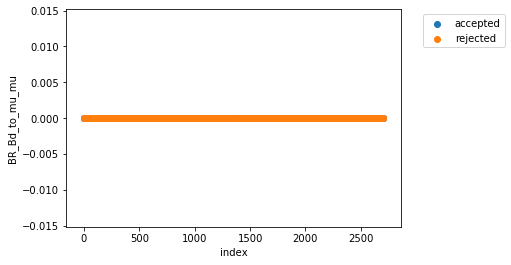

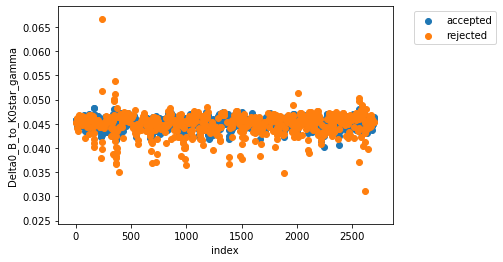

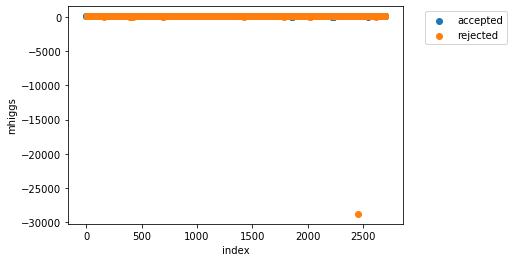

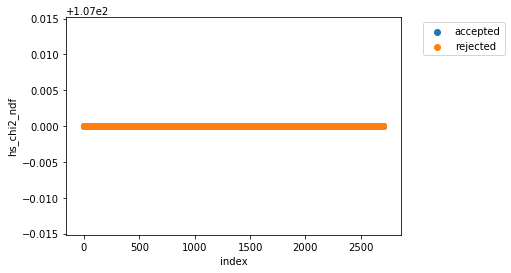

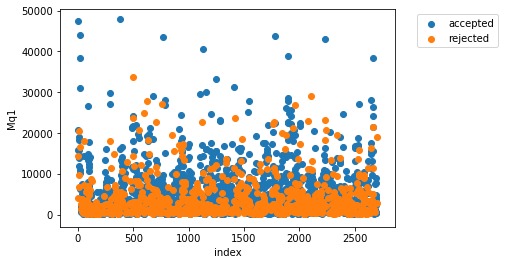

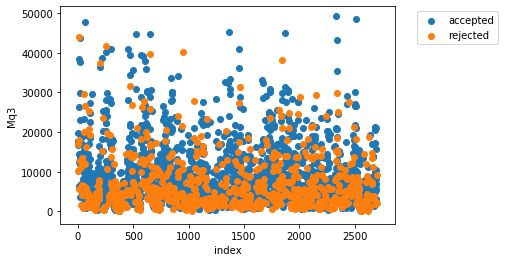

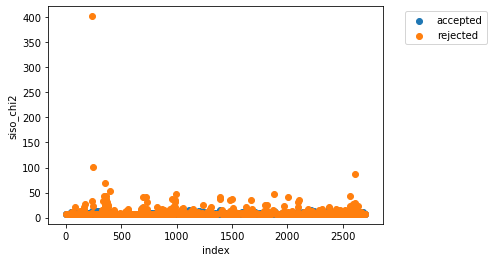

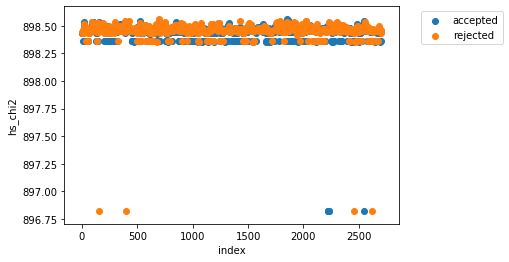

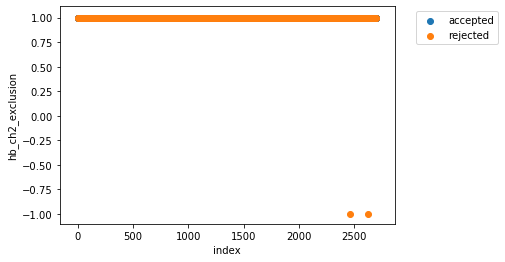

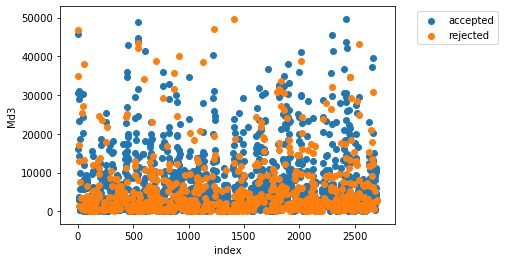

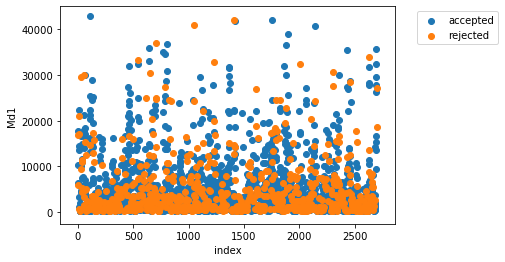

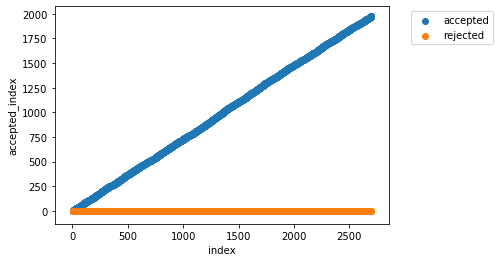

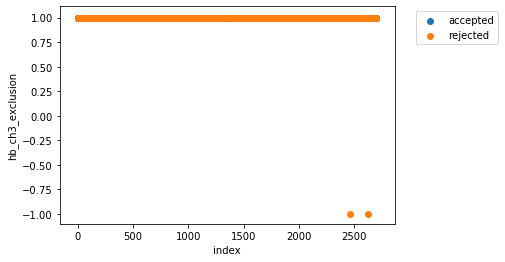

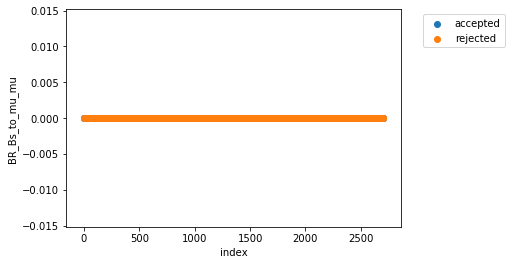

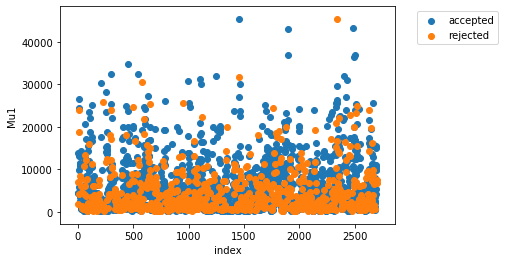

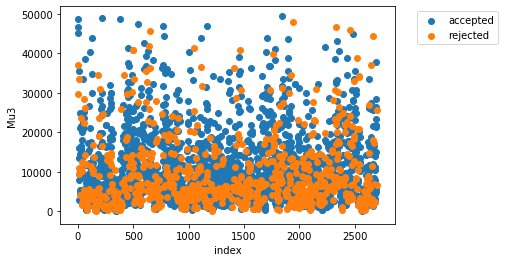

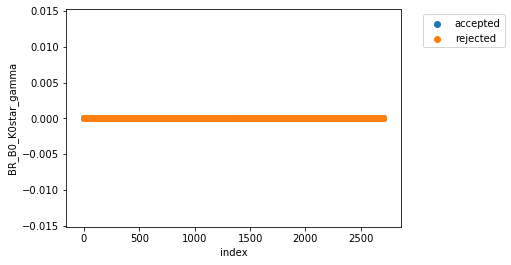

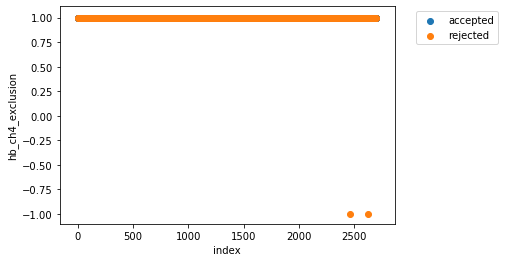

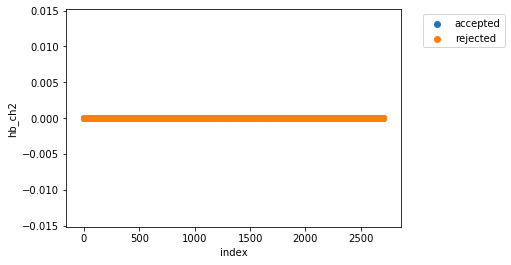

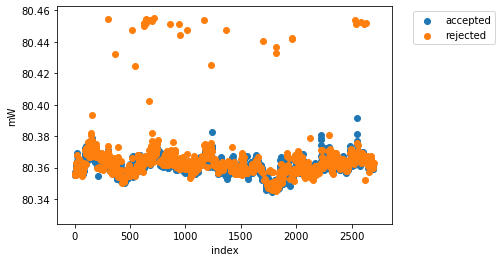

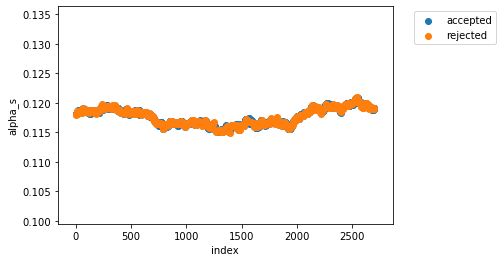

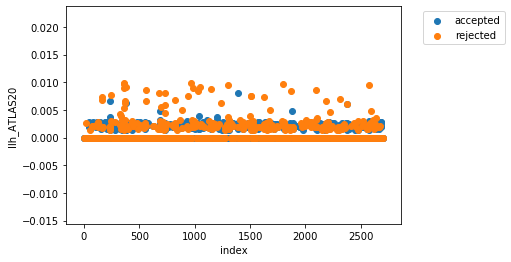

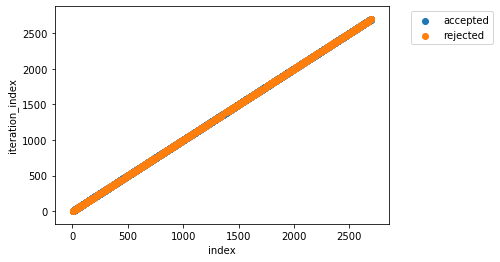

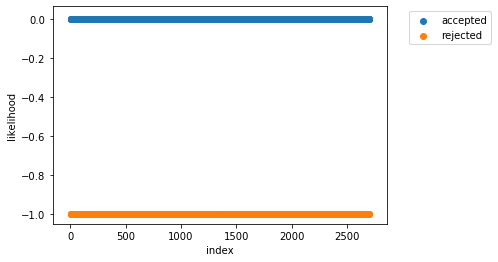

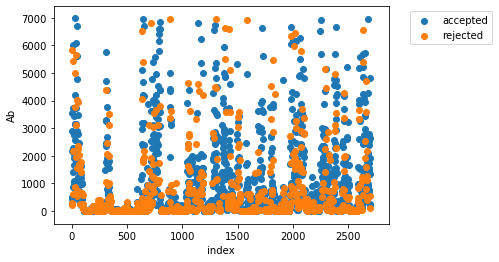

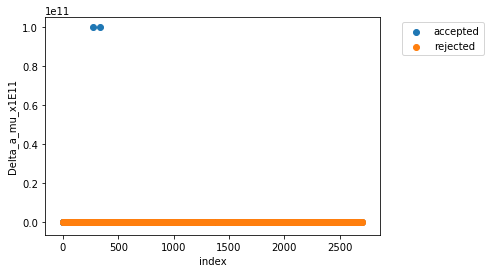

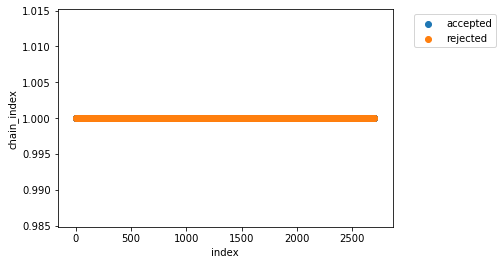

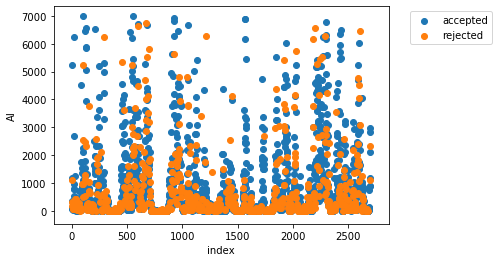

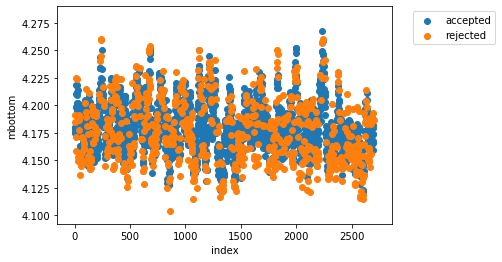

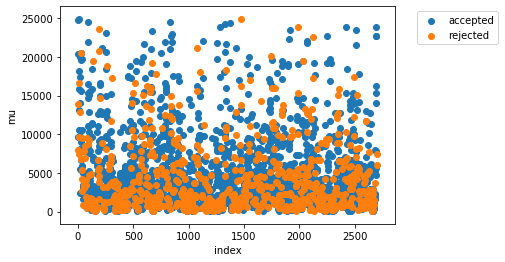

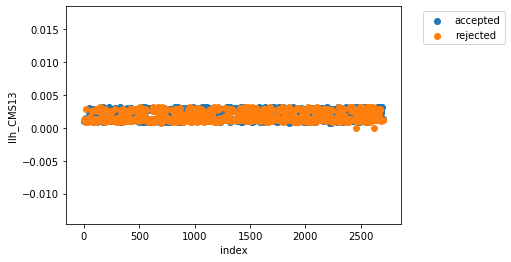

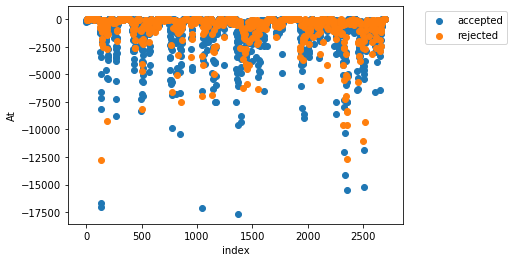

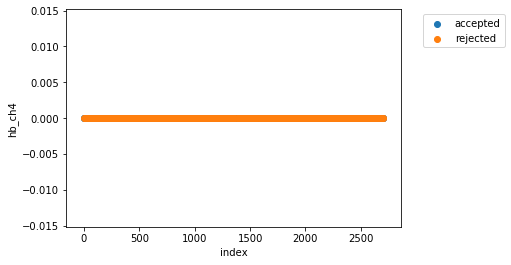

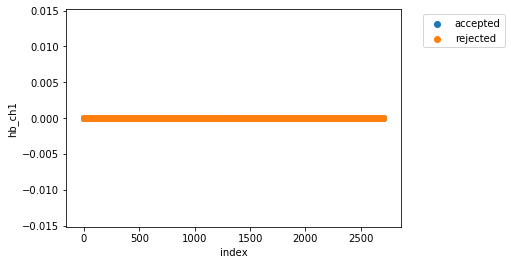

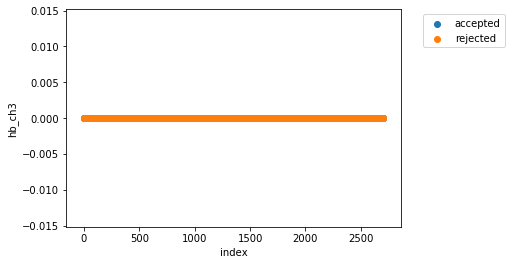

In [106]:
for v in df.columns:
    plt.scatter(accepted_df['iteration_index'],accepted_df[v])
    plt.scatter(failed_df['iteration_index'],failed_df[v])
    plt.xlabel('index')
    plt.ylabel(v)
    plt.legend(['accepted','rejected'],bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()